Same process as for Germany, however now done for Greece to be able to compare both countries

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_pickle("../data/pickles/tepsr_wc120.pkl")

Let's have a look at the data

In [4]:
df.head()

,unit,sex,age,isced11,geo,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,PC,T,Y20-64,ED0-2,AT,52.0,54.0,56.5,55.7,54.0,54.9,55.3,54.7,53.9,53.1,53.1,53.9,53.9,55.6,55.7
1,PC,T,Y20-64,ED0-2,BE,48.8,48.8,49.5,49.1,47.7,48.4,47.3,47.1,46.8,46.6,45.6,45.6,45.9,45.6,46.3
2,PC,T,Y20-64,ED0-2,BG,39.4,40.2,43.5,46.5,45.0,39.8,36.7,36.2,36.9,38.6,39.0,39.2,44.4,46.2,51.2
3,PC,T,Y20-64,ED0-2,CH,66.5,66.2,67.3,69.0,69.0,67.1,67.7,68.1,67.9,67.9,68.1,68.1,67.7,69.2,69.7
4,PC,T,Y20-64,ED0-2,CY,64.8,66.6,66.4,64.1,64.9,66.8,65.1,57.8,54.9,54.6,55.1,56.8,57.0,61.6,63.2


In [5]:
df["isced11"].unique()

array(['ED0-2', 'ED3_4', 'ED5-8'], dtype=object)

There are 3 types of education levels:
- ED0-2: Less than primary, primary and lower secundary education (level 0-2)
- ED3_4: Upper secondary and post-secundary non-tertiary education (level 3-4)
- ED5-8: Tertiary education (level 5-8)

In [6]:
df["geo"].unique()

array(['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EA19', 'EE', 'EL',
       'ES', 'EU27_2020', 'EU28', 'FI', 'FR', 'HR', 'HU', 'IE', 'IS',
       'IT', 'LT', 'LU', 'LV', 'ME', 'MK', 'MT', 'NL', 'NO', 'PL', 'PT',
       'RO', 'RS', 'SE', 'SI', 'SK', 'TR', 'UK'], dtype=object)

In [7]:
df["sex"].unique()

array(['T'], dtype=object)

Only Total for sex is available, meaning male and female together

Filter for the 28 EU countries only

In [8]:
df_eu28 = df.loc[df["geo"] == "EU28"]

In [9]:
df_eu28.head()

,unit,sex,age,isced11,geo,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
13,PC,T,Y20-64,ED0-2,EU28,55.5,56.3,56.9,56.4,54.2,53.3,52.8,52.1,51.3,51.8,52.6,53.6,54.9,56.1,56.7
51,PC,T,Y20-64,ED3_4,EU28,69.4,70.4,71.4,71.7,70.3,69.8,69.8,69.6,69.4,70.1,70.7,71.6,72.6,73.4,73.9
89,PC,T,Y20-64,ED5-8,EU28,82.6,83.2,83.8,83.8,82.9,82.4,82.1,81.9,81.7,82.0,82.7,83.4,84.0,84.5,85.0


Only leave the columns that we use for this particular analysis: isced11 (education level) and year.
And transform the dataframe to a suitable format for plotting

In [10]:
df_eu28 = df_eu28.drop(columns=["unit", "sex", "age", "geo"])

In [11]:
df_eu28 = df_eu28.set_index("isced11")

In [12]:
df_eu28

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
isced11,,,,,,,,,,,,,,,
ED0-2,55.5,56.3,56.9,56.4,54.2,53.3,52.8,52.1,51.3,51.8,52.6,53.6,54.9,56.1,56.7
ED3_4,69.4,70.4,71.4,71.7,70.3,69.8,69.8,69.6,69.4,70.1,70.7,71.6,72.6,73.4,73.9
ED5-8,82.6,83.2,83.8,83.8,82.9,82.4,82.1,81.9,81.7,82.0,82.7,83.4,84.0,84.5,85.0


In [13]:
df_eu28 = df_eu28.T

In [14]:
df_eu28

isced11,ED0-2,ED3_4,ED5-8
2005,55.5,69.4,82.6
2006,56.3,70.4,83.2
2007,56.9,71.4,83.8
2008,56.4,71.7,83.8
2009,54.2,70.3,82.9
2010,53.3,69.8,82.4
2011,52.8,69.8,82.1
2012,52.1,69.6,81.9
2013,51.3,69.4,81.7
2014,51.8,70.1,82.0


In [15]:
df_eu28.reset_index(inplace=True)

In [16]:
df_eu28

isced11,index,ED0-2,ED3_4,ED5-8
0,2005,55.5,69.4,82.6
1,2006,56.3,70.4,83.2
2,2007,56.9,71.4,83.8
3,2008,56.4,71.7,83.8
4,2009,54.2,70.3,82.9
5,2010,53.3,69.8,82.4
6,2011,52.8,69.8,82.1
7,2012,52.1,69.6,81.9
8,2013,51.3,69.4,81.7
9,2014,51.8,70.1,82.0


In [17]:
df_eu28.rename(columns={"index":"year"}, inplace=True)

In [18]:
df_eu28

isced11,year,ED0-2,ED3_4,ED5-8
0,2005,55.5,69.4,82.6
1,2006,56.3,70.4,83.2
2,2007,56.9,71.4,83.8
3,2008,56.4,71.7,83.8
4,2009,54.2,70.3,82.9
5,2010,53.3,69.8,82.4
6,2011,52.8,69.8,82.1
7,2012,52.1,69.6,81.9
8,2013,51.3,69.4,81.7
9,2014,51.8,70.1,82.0


Since we are mainly focused on unemployment rate, we decided to do 100 - employment rate for simplicity reasons. We are aware that in the real life this isn't such an easy calculation, and we are aware that this ignores various factors. 

In [19]:
df_eu28['ED0-2low'] = (100 - df_eu28["ED0-2"])
df_eu28['ED3_4medium'] = (100 - df_eu28["ED3_4"])
df_eu28['ED5-8high'] = (100 - df_eu28["ED5-8"])

In [20]:
df_eu28

isced11,year,ED0-2,ED3_4,ED5-8,ED0-2low,ED3_4medium,ED5-8high
0,2005,55.5,69.4,82.6,44.5,30.6,17.4
1,2006,56.3,70.4,83.2,43.7,29.6,16.8
2,2007,56.9,71.4,83.8,43.1,28.6,16.2
3,2008,56.4,71.7,83.8,43.6,28.3,16.2
4,2009,54.2,70.3,82.9,45.8,29.7,17.1
5,2010,53.3,69.8,82.4,46.7,30.2,17.6
6,2011,52.8,69.8,82.1,47.2,30.2,17.9
7,2012,52.1,69.6,81.9,47.9,30.4,18.1
8,2013,51.3,69.4,81.7,48.7,30.6,18.3
9,2014,51.8,70.1,82.0,48.2,29.9,18.0


Plotting all 3 education levels in 1 plot

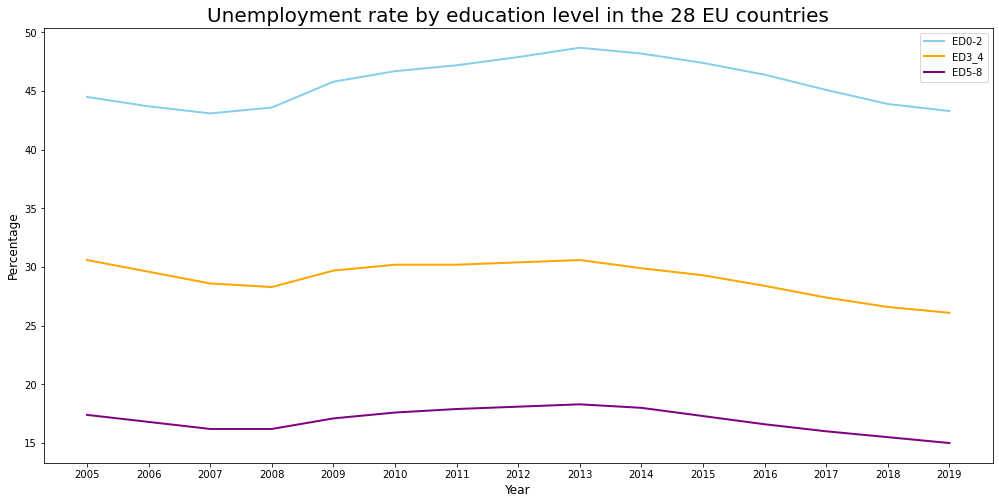

In [21]:
fig, ax = plt.pyplot.subplots(figsize=(17,8))

plt.pyplot.title("Unemployment rate by education level in the 28 EU countries", fontsize=20)
plt.pyplot.xlabel("Year", fontsize=12)
plt.pyplot.ylabel("Percentage", fontsize=12)
ax.plot("year", "ED0-2low", data=df_eu28, color='skyblue', linewidth=2, label="ED0-2")
ax.plot("year", "ED3_4medium", data=df_eu28, color='orange', linewidth=2, label="ED3_4")
ax.plot("year", "ED5-8high", data=df_eu28, color='purple', linewidth=2, label="ED5-8")
plt.pyplot.legend()

The lowest unemployment rate is among people with higher education, the highest unemployment rate is among people with lower education. The overall unemployment rate is going up after 2008, and it already started a year earlier for the low education level. The lower education level's unemployment rate seems to increase more compared to the medium and higher education levels. The unemployment rate for all 3 levels seem to decrease again after 2013. 

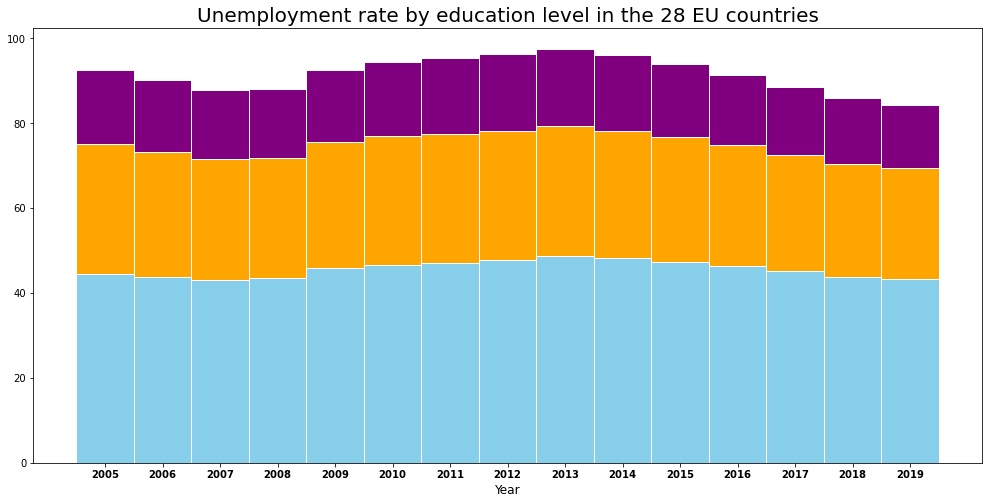

In [22]:
fig, ax = plt.pyplot.subplots(figsize=(17,8))

# Values of each group
bars1 = df_eu28["ED0-2low"]
bars2 = df_eu28["ED3_4medium"]
bars3 = df_eu28["ED5-8high"]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
 
# Names of group and bar width
names = ['2005','2006','2007','2008','2009', '2010', '2011', 
         '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
barWidth = 1
 
plt.pyplot.title("Unemployment rate by education level in the 28 EU countries", fontsize=20)
# Create brown bars
plt.pyplot.bar(r, bars1, color='skyblue', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.pyplot.bar(r, bars2, bottom=bars1, color='orange', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.pyplot.bar(r, bars3, bottom=bars, color='purple', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.pyplot.xticks(r, names, fontweight='bold')
plt.pyplot.xlabel("Year",fontsize=12)
 
# Show graphic
plt.pyplot.show()


In [23]:
df_eu28.to_pickle("../data/output/education_employment_rate_eu28.pkl")